## Image Reconstruction using Compressed Sensing

### 1. Loading and Visualizing the Image

C:\Users\shash\Desktop\Environments\deeplearning_class\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


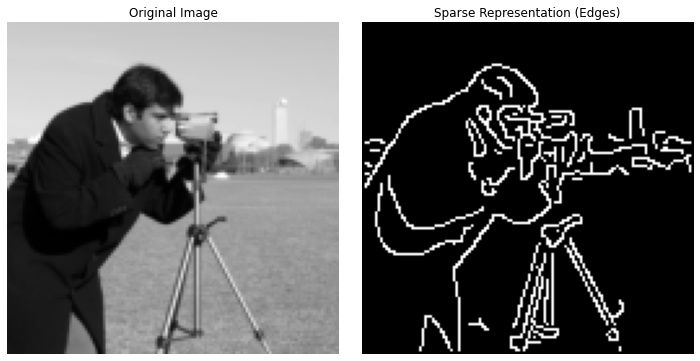

In [1]:
from skimage import data, color, transform, feature
import matplotlib.pyplot as plt

# Load sample image
image = data.camera()
image = transform.resize(image, (128, 128))  # Resizing to manageable size

# Convert the image to grayscale
gray_image = color.rgb2gray(image) if len(image.shape) == 3 else image

# Edge detection to get a sparse representation
edges = feature.canny(gray_image)

# Visualize original and sparse representation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Sparse Representation (Edges)')
ax[1].axis('off')

plt.tight_layout()
plt.show()

### 2. Applying the Radon Transform and Subsampling

C:\Users\shash\Desktop\Environments\deeplearning_class\lib\site-packages\skimage\transform\radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


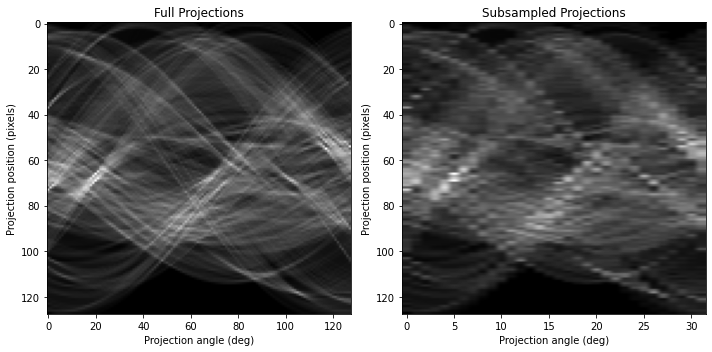

In [2]:
from skimage.transform import radon, iradon
import numpy as np

# Set of angles for the Radon transform
theta = np.linspace(0., 180., max(gray_image.shape), endpoint=False)

# Apply Radon transform to get projections
sinogram = radon(edges, theta=theta, circle=True)

# Subsample: Taking every 4th projection angle as an example
subsampled_theta = theta[::4]
subsampled_sinogram = sinogram[:, ::4]

# Visualize original and subsampled sinograms (projections)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(sinogram, cmap='gray', aspect='auto')
ax[0].set_title('Full Projections')
ax[0].set_xlabel('Projection angle (deg)')
ax[0].set_ylabel('Projection position (pixels)')

ax[1].imshow(subsampled_sinogram, cmap='gray', aspect='auto')
ax[1].set_title('Subsampled Projections')
ax[1].set_xlabel('Projection angle (deg)')
ax[1].set_ylabel('Projection position (pixels)')

plt.tight_layout()
plt.show()

### 3. Reconstruction from Subsampled Projections

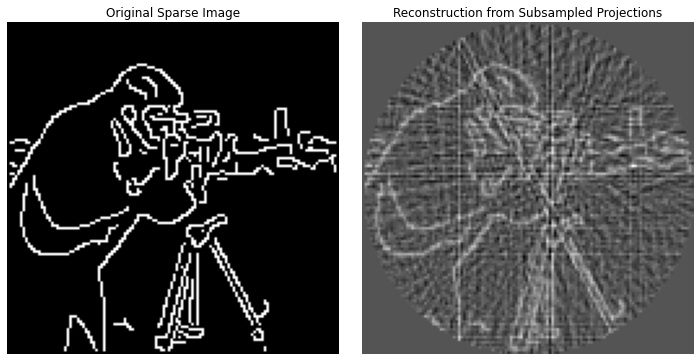

In [3]:
# Use Inverse Radon transform for reconstruction
reconstruction = iradon(subsampled_sinogram, theta=subsampled_theta, circle=True)

# Visualize the original sparse image and the reconstruction
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(edges, cmap='gray')
ax[0].set_title('Original Sparse Image')
ax[0].axis('off')

ax[1].imshow(reconstruction, cmap='gray')
ax[1].set_title('Reconstruction from Subsampled Projections')
ax[1].axis('off')

plt.tight_layout()
plt.show()

In this notebook, we showcased the process of image reconstruction using compressed sensing principles. We started with an image, represented it sparsely using edge detection, applied the Radon transform, and then tried to reconstruct the image using fewer projections. The outcome is a demonstration of how compressed sensing can recover significant information with fewer measurements.